## Model Setup

In [1]:
import sys
print(sys.version)
print(sys.version_info)
!python --version
!pip --version

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)
Python 3.11.7
pip 24.0 from D:\Programs\anaconda3\envs\crowd311\Lib\site-packages\pip (python 3.11)



In [3]:
import h5py
print(h5py.__version__)
import cv2
print(cv2.__version__)
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)
import scipy
print(scipy.__version__)
import tqdm
print(tqdm.__version__)
import matplotlib
print(matplotlib.__version__)
import numpy
print(numpy.__version__)

3.10.0
4.9.0
2.15.0
2.15.0
1.12.0
4.66.1
3.8.3
1.26.3


In [4]:
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras

# Assuming you have the correct file names
model_path = "models/Model1.json"  # Or "path/to/your/model.json" if using separate files
weights_path = "models/model_A_weights.h5"  # If weights are saved separately, provide the path here

# Load the model architecture
if model_path.endswith(".h5"):
    model = keras.models.load_model(model_path)
else:
    # Load model architecture from JSON
    with open(model_path, "r") as f:
        model_json = f.read()
    model = keras.models.model_from_json(model_json)

    # Load weights if saved separately
    if weights_path:
        model.load_weights(weights_path)

In [5]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [6]:
# Get the weights
weights = model.get_weights()
# print the details of weights
for i , weight in enumerate(weights):
    print(f"Weight {i}:")
    print(f"Shape: {weight.shape}")
    #print(f"Values: {weight}")

Weight 0:
Shape: (3, 3, 3, 64)
Weight 1:
Shape: (64,)
Weight 2:
Shape: (3, 3, 64, 64)
Weight 3:
Shape: (64,)
Weight 4:
Shape: (3, 3, 64, 128)
Weight 5:
Shape: (128,)
Weight 6:
Shape: (3, 3, 128, 128)
Weight 7:
Shape: (128,)
Weight 8:
Shape: (3, 3, 128, 256)
Weight 9:
Shape: (256,)
Weight 10:
Shape: (3, 3, 256, 256)
Weight 11:
Shape: (256,)
Weight 12:
Shape: (3, 3, 256, 256)
Weight 13:
Shape: (256,)
Weight 14:
Shape: (3, 3, 256, 512)
Weight 15:
Shape: (512,)
Weight 16:
Shape: (3, 3, 512, 512)
Weight 17:
Shape: (512,)
Weight 18:
Shape: (3, 3, 512, 512)
Weight 19:
Shape: (512,)
Weight 20:
Shape: (3, 3, 512, 512)
Weight 21:
Shape: (512,)
Weight 22:
Shape: (3, 3, 512, 512)
Weight 23:
Shape: (512,)
Weight 24:
Shape: (3, 3, 512, 512)
Weight 25:
Shape: (512,)
Weight 26:
Shape: (3, 3, 512, 256)
Weight 27:
Shape: (256,)
Weight 28:
Shape: (3, 3, 256, 128)
Weight 29:
Shape: (128,)
Weight 30:
Shape: (3, 3, 128, 64)
Weight 31:
Shape: (64,)
Weight 32:
Shape: (1, 1, 64, 1)
Weight 33:
Shape: (1,)


1/1 [==============================] - 4s 4s/step


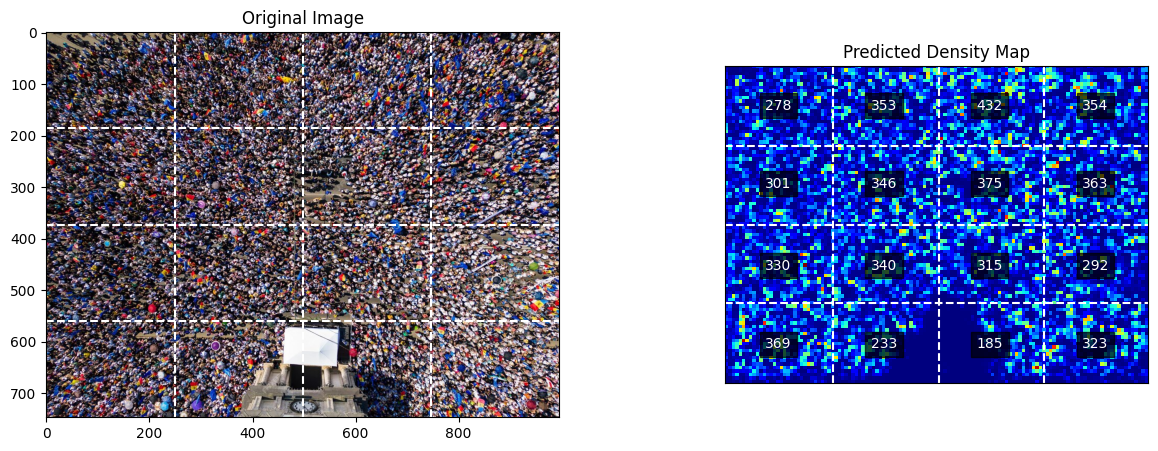

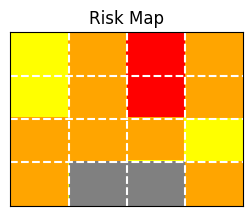

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from scipy.ndimage import gaussian_filter
from matplotlib.gridspec import GridSpec

# Load the image
image_path = "data/con2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Apply preprocessing steps
im = Image.open(image_path).convert('RGB')
im = np.array(im)
im = im / 255.0
im[:, :, 0] = (im[:, :, 0] - 0.485) / 0.229
im[:, :, 1] = (im[:, :, 1] - 0.456) / 0.224
im[:, :, 2] = (im[:, :, 2] - 0.406) / 0.225

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(im, axis=0)

# Make predictions (assuming model is defined and trained)
predicted_density_map = model.predict(input_image)

# Calculate count for each region
region_counts = []
for i in range(4):
    row_counts = []
    for j in range(4):
        # Calculate region boundaries
        start_x = i * predicted_density_map.shape[1] // 4
        end_x = (i + 1) * predicted_density_map.shape[1] // 4
        start_y = j * predicted_density_map.shape[2] // 4
        end_y = (j + 1) * predicted_density_map.shape[2] // 4

        # Calculate count for the region
        region_count = int(round(np.sum(predicted_density_map[0, start_x:end_x, start_y:end_y, 0])))
        row_counts.append(region_count)
    region_counts.append(row_counts)

# Display the original image, predicted density map, and count of people in the predicted image
plt.figure(figsize=(15, 5))

# Create grid of subplots with a larger width ratio for the Risk Map
gs = GridSpec(1, 2, width_ratios=[3, 2])

# Original Image
ax0 = plt.subplot(gs[0])
ax0.imshow(image)
ax0.set_title('Original Image')

# Add grid to the original image
for i in range(1, 4):
    ax0.axvline(x=image.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax0.axhline(y=image.shape[0] * j // 4, color='white', linestyle='--')

# Predicted Density Map with count on the right side
ax1 = plt.subplot(gs[1])
density_map = ax1.imshow(predicted_density_map[0, :, :, 0], cmap='jet', interpolation='nearest')

# Add grid to the predicted density map
for i in range(1, 4):
    ax1.axvline(x=predicted_density_map.shape[2] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax1.axhline(y=predicted_density_map.shape[1] * j // 4, color='white', linestyle='--')

# Annotate each region with its count
for i in range(4):
    for j in range(4):
        # Calculate region boundaries for annotation
        x_center = (i + 0.5) * predicted_density_map.shape[1] // 4
        y_center = (j + 0.5) * predicted_density_map.shape[2] // 4

        # Annotate the figure with region count
        ax1.text(y_center, x_center, str(region_counts[i][j]), color='white', fontsize=10,
                 ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))

# Set the title for the Predicted Density Map
ax1.set_title('Predicted Density Map')

# Remove the title and labels for the density map
ax1.set_xticks([])
ax1.set_yticks([])

# Calculate normalized counts for color mapping
max_count = max([max(row) for row in region_counts])
normalized_counts = np.array(region_counts) / max_count  # Normalize to 0-1 range for color mapping

# Create a risk map with colors based on normalized counts
risk_map = np.zeros_like(predicted_density_map[0, :, :, 0])
for i in range(4):
    for j in range(4):
        risk_map[i * predicted_density_map.shape[1] // 4:(i + 1) * predicted_density_map.shape[1] // 4,
                 j * predicted_density_map.shape[2] // 4:(j + 1) * predicted_density_map.shape[2] // 4] = normalized_counts[i][j]

# Define custom colors for the colormap
colors = ['#808080', '#FFFF00', '#FFA500', '#FF0000'] # Gray, Yellow, Orange, Red

# Create a colormap using the defined colors
custom_cmap = mcolors.ListedColormap(colors)

# Create a separate figure for the risk map
plt.figure(figsize=(3, 3))
plt.imshow(risk_map, cmap=custom_cmap)  # Use a colormap suitable for visualizing risk
plt.title('Risk Map')
plt.xticks([])
plt.yticks([])

# Add grid to the risk map
for i in range(1, 4):
    plt.axvline(x=risk_map.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    plt.axhline(y=risk_map.shape[0] * j // 4, color='white', linestyle='--')

plt.show()

1/1 [==============================] - 4s 4s/step


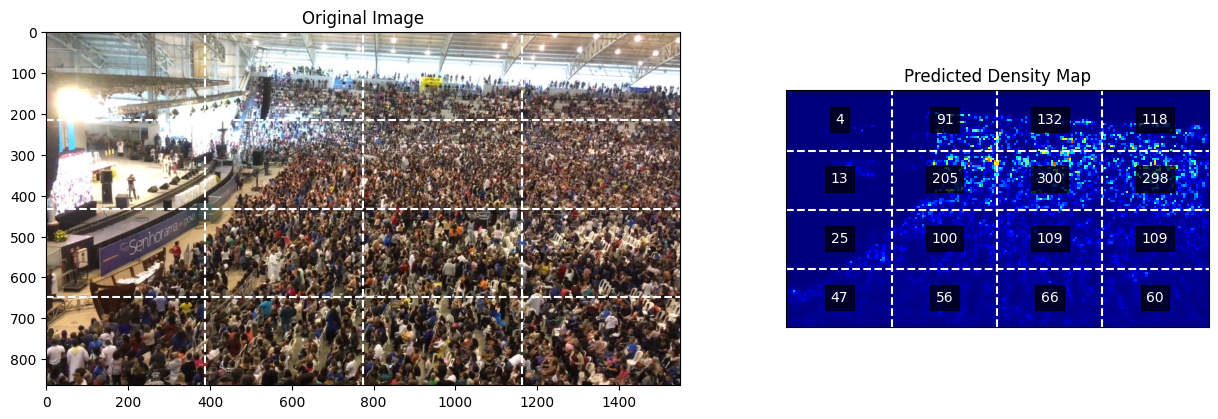

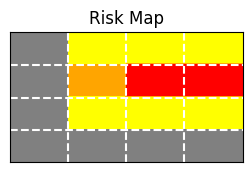

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from scipy.ndimage import gaussian_filter
from matplotlib.gridspec import GridSpec

# Load the image
image_path = "data/conf.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Apply preprocessing steps
im = Image.open(image_path).convert('RGB')
im = np.array(im)
im = im / 255.0
im[:, :, 0] = (im[:, :, 0] - 0.485) / 0.229
im[:, :, 1] = (im[:, :, 1] - 0.456) / 0.224
im[:, :, 2] = (im[:, :, 2] - 0.406) / 0.225

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(im, axis=0)

# Make predictions (assuming model is defined and trained)
predicted_density_map = model.predict(input_image)

# Calculate count for each region
region_counts = []
for i in range(4):
    row_counts = []
    for j in range(4):
        # Calculate region boundaries
        start_x = i * predicted_density_map.shape[1] // 4
        end_x = (i + 1) * predicted_density_map.shape[1] // 4
        start_y = j * predicted_density_map.shape[2] // 4
        end_y = (j + 1) * predicted_density_map.shape[2] // 4

        # Calculate count for the region
        region_count = int(round(np.sum(predicted_density_map[0, start_x:end_x, start_y:end_y, 0])))
        row_counts.append(region_count)
    region_counts.append(row_counts)

# Display the original image, predicted density map, and count of people in the predicted image
plt.figure(figsize=(15, 5))

# Create grid of subplots with a larger width ratio for the Risk Map
gs = GridSpec(1, 2, width_ratios=[3, 2])

# Original Image
ax0 = plt.subplot(gs[0])
ax0.imshow(image)
ax0.set_title('Original Image')

# Add grid to the original image
for i in range(1, 4):
    ax0.axvline(x=image.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax0.axhline(y=image.shape[0] * j // 4, color='white', linestyle='--')

# Predicted Density Map with count on the right side
ax1 = plt.subplot(gs[1])
density_map = ax1.imshow(predicted_density_map[0, :, :, 0], cmap='jet', interpolation='nearest')

# Add grid to the predicted density map
for i in range(1, 4):
    ax1.axvline(x=predicted_density_map.shape[2] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax1.axhline(y=predicted_density_map.shape[1] * j // 4, color='white', linestyle='--')

# Annotate each region with its count
for i in range(4):
    for j in range(4):
        # Calculate region boundaries for annotation
        x_center = (i + 0.5) * predicted_density_map.shape[1] // 4
        y_center = (j + 0.5) * predicted_density_map.shape[2] // 4

        # Annotate the figure with region count
        ax1.text(y_center, x_center, str(region_counts[i][j]), color='white', fontsize=10,
                 ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))

# Set the title for the Predicted Density Map
ax1.set_title('Predicted Density Map')

# Remove the title and labels for the density map
ax1.set_xticks([])
ax1.set_yticks([])

# Calculate normalized counts for color mapping
max_count = max([max(row) for row in region_counts])
normalized_counts = np.array(region_counts) / max_count  # Normalize to 0-1 range for color mapping

# Create a risk map with colors based on normalized counts
risk_map = np.zeros_like(predicted_density_map[0, :, :, 0])
for i in range(4):
    for j in range(4):
        risk_map[i * predicted_density_map.shape[1] // 4:(i + 1) * predicted_density_map.shape[1] // 4,
                 j * predicted_density_map.shape[2] // 4:(j + 1) * predicted_density_map.shape[2] // 4] = normalized_counts[i][j]

# Define custom colors for the colormap
colors = ['#808080', '#FFFF00', '#FFA500', '#FF0000'] # Gray, Yellow, Orange, Red

# Create a colormap using the defined colors
custom_cmap = mcolors.ListedColormap(colors)

# Create a separate figure for the risk map
plt.figure(figsize=(3, 3))
plt.imshow(risk_map, cmap=custom_cmap)  # Use a colormap suitable for visualizing risk
plt.title('Risk Map')
plt.xticks([])
plt.yticks([])

# Add grid to the risk map
for i in range(1, 4):
    plt.axvline(x=risk_map.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    plt.axhline(y=risk_map.shape[0] * j // 4, color='white', linestyle='--')

plt.show()

1/1 [==============================] - 3s 3s/step


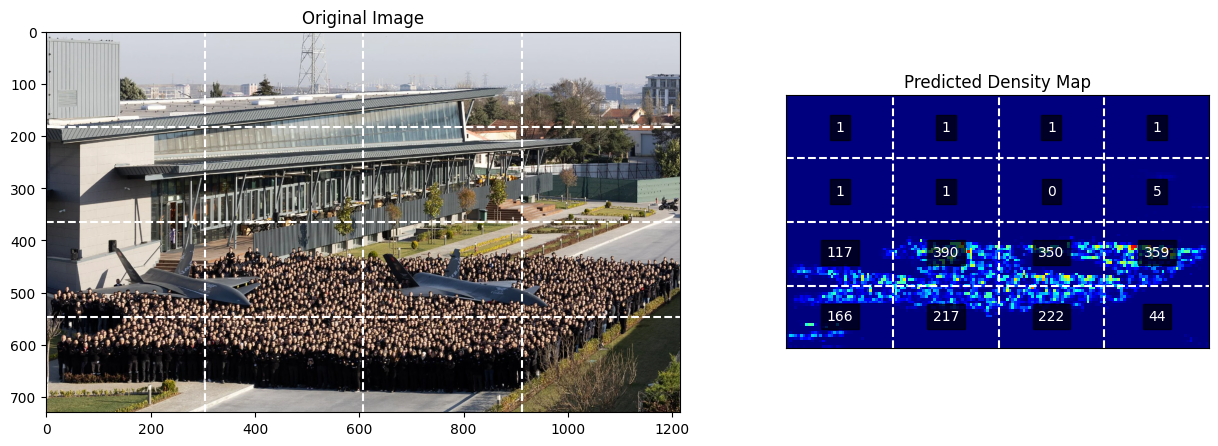

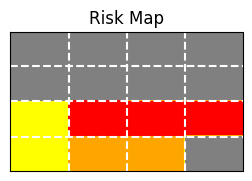

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from scipy.ndimage import gaussian_filter
from matplotlib.gridspec import GridSpec

# Load the image
image_path = "data/crowd.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Apply preprocessing steps
im = Image.open(image_path).convert('RGB')
im = np.array(im)
im = im / 255.0
im[:, :, 0] = (im[:, :, 0] - 0.485) / 0.229
im[:, :, 1] = (im[:, :, 1] - 0.456) / 0.224
im[:, :, 2] = (im[:, :, 2] - 0.406) / 0.225

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(im, axis=0)

# Make predictions (assuming model is defined and trained)
predicted_density_map = model.predict(input_image)

# Calculate count for each region
region_counts = []
for i in range(4):
    row_counts = []
    for j in range(4):
        # Calculate region boundaries
        start_x = i * predicted_density_map.shape[1] // 4
        end_x = (i + 1) * predicted_density_map.shape[1] // 4
        start_y = j * predicted_density_map.shape[2] // 4
        end_y = (j + 1) * predicted_density_map.shape[2] // 4

        # Calculate count for the region
        region_count = int(round(np.sum(predicted_density_map[0, start_x:end_x, start_y:end_y, 0])))
        row_counts.append(region_count)
    region_counts.append(row_counts)

# Display the original image, predicted density map, and count of people in the predicted image
plt.figure(figsize=(15, 5))

# Create grid of subplots with a larger width ratio for the Risk Map
gs = GridSpec(1, 2, width_ratios=[3, 2])

# Original Image
ax0 = plt.subplot(gs[0])
ax0.imshow(image)
ax0.set_title('Original Image')

# Add grid to the original image
for i in range(1, 4):
    ax0.axvline(x=image.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax0.axhline(y=image.shape[0] * j // 4, color='white', linestyle='--')

# Predicted Density Map with count on the right side
ax1 = plt.subplot(gs[1])
density_map = ax1.imshow(predicted_density_map[0, :, :, 0], cmap='jet', interpolation='nearest')

# Add grid to the predicted density map
for i in range(1, 4):
    ax1.axvline(x=predicted_density_map.shape[2] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    ax1.axhline(y=predicted_density_map.shape[1] * j // 4, color='white', linestyle='--')

# Annotate each region with its count
for i in range(4):
    for j in range(4):
        # Calculate region boundaries for annotation
        x_center = (i + 0.5) * predicted_density_map.shape[1] // 4
        y_center = (j + 0.5) * predicted_density_map.shape[2] // 4

        # Annotate the figure with region count
        ax1.text(y_center, x_center, str(region_counts[i][j]), color='white', fontsize=10,
                 ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))

# Set the title for the Predicted Density Map
ax1.set_title('Predicted Density Map')

# Remove the title and labels for the density map
ax1.set_xticks([])
ax1.set_yticks([])

# Calculate normalized counts for color mapping
max_count = max([max(row) for row in region_counts])
normalized_counts = np.array(region_counts) / max_count  # Normalize to 0-1 range for color mapping

# Create a risk map with colors based on normalized counts
risk_map = np.zeros_like(predicted_density_map[0, :, :, 0])
for i in range(4):
    for j in range(4):
        risk_map[i * predicted_density_map.shape[1] // 4:(i + 1) * predicted_density_map.shape[1] // 4,
                 j * predicted_density_map.shape[2] // 4:(j + 1) * predicted_density_map.shape[2] // 4] = normalized_counts[i][j]

# Define custom colors for the colormap
colors = ['#808080', '#FFFF00', '#FFA500', '#FF0000'] # Gray, Yellow, Orange, Red

# Create a colormap using the defined colors
custom_cmap = mcolors.ListedColormap(colors)

# Create a separate figure for the risk map
plt.figure(figsize=(3, 3))
plt.imshow(risk_map, cmap=custom_cmap)  # Use a colormap suitable for visualizing risk
plt.title('Risk Map')
plt.xticks([])
plt.yticks([])

# Add grid to the risk map
for i in range(1, 4):
    plt.axvline(x=risk_map.shape[1] * i // 4, color='white', linestyle='--')
for j in range(1, 4):
    plt.axhline(y=risk_map.shape[0] * j // 4, color='white', linestyle='--')

plt.show()

## video implementation

In [10]:
## old code

In [204]:
import cv2
import numpy as np
from matplotlib import cm

# Define the preprocessing function
def preprocess_frame(frame):
    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Convert to floating point and normalize
    frame_normalized = frame_rgb.astype(np.float32) / 255.0
    # Apply mean normalization
    frame_normalized[:, :, 0] = (frame_normalized[:, :, 0] - 0.485) / 0.229
    frame_normalized[:, :, 1] = (frame_normalized[:, :, 1] - 0.456) / 0.224
    frame_normalized[:, :, 2] = (frame_normalized[:, :, 2] - 0.406) / 0.225
    # Expand dimensions to create a batch of size 1
    input_frame = np.expand_dims(frame_normalized, axis=0)
    return input_frame

# Open the video file
video_path = "data/conference.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Set a skip_frames variable to control how many frames to skip during processing
skip_frames = 5

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Skip frames
    if cap.get(cv2.CAP_PROP_POS_FRAMES) % skip_frames != 0:
        continue
    
    # Preprocess the frame
    input_frame = preprocess_frame(frame)
    # Predict density map
    predicted_density_map = model.predict(input_frame)
    # Resize the predicted density map to match the dimensions of the frame
    resized_density_map = cv2.resize(predicted_density_map[0, :, :, 0], (frame.shape[1], frame.shape[0]))
    # Normalize the resized density map
    normalized_density_map = cv2.normalize(resized_density_map, None, 0, 1, cv2.NORM_MINMAX)
    
    # Apply colormap
    colored_density_map = (cm.jet(normalized_density_map) * 255).astype(np.uint8)
    # Convert to RGB format
    colored_density_map_rgb = cv2.cvtColor(colored_density_map, cv2.COLOR_BGR2RGB)
    # Blend the heatmap with the original frame
    blended_image = cv2.addWeighted(frame, 0.6, colored_density_map_rgb, 0.4, 0)

    # Calculate count for each region
    region_counts = []
    for i in range(4):
        row_counts = []
        for j in range(4):
            # Calculate region boundaries
            start_x = i * normalized_density_map.shape[0] // 4
            end_x = (i + 1) * normalized_density_map.shape[0] // 4
            start_y = j * normalized_density_map.shape[1] // 4
            end_y = (j + 1) * normalized_density_map.shape[1] // 4

            # Calculate count for the region
            region_count = int(round(np.sum(normalized_density_map[start_x:end_x, start_y:end_y])))
            row_counts.append(region_count)
        region_counts.append(row_counts)

    # Display count on each region and draw grids
    for i in range(4):
        for j in range(4):
            # Calculate region center for annotation
            x_center = int((2*i + 1) * frame.shape[1] // 8)
            y_center = int((2*j + 1) * frame.shape[0] // 8)

            # Display count on the frame with corrected coordinates
            cv2.putText(blended_image, str(region_counts[i][j]), (x_center, y_center), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

            # Draw grid lines
            cv2.rectangle(blended_image, (i*frame.shape[1]//4, j*frame.shape[0]//4), ((i+1)*frame.shape[1]//4, (j+1)*frame.shape[0]//4), (255, 255, 255), 1)

    # Display the blended image
    cv2.imshow("Output Video", blended_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
#old

1/1 [==============================] - 1s 691ms/step


In [206]:
# new code, count correct, count overlay issue

In [207]:
import cv2
import numpy as np

# Open the video file
video_path = "data/crowd1.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create windows to display frames
cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Load the image and apply preprocessing steps
    im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = im / 255.0
    im[:, :, 0] = (im[:, :, 0] - 0.485) / 0.229
    im[:, :, 1] = (im[:, :, 1] - 0.456) / 0.224
    im[:, :, 2] = (im[:, :, 2] - 0.406) / 0.225
    input_image = np.expand_dims(im, axis=0)

    # Make predictions (assuming model is defined and trained)
    predicted_density_map = model.predict(input_image)

    # Calculate count for each region
    region_counts = []
    for i in range(4):
        row_counts = []
        for j in range(4):
            # Calculate region boundaries
            start_x = i * predicted_density_map.shape[1] // 4
            end_x = (i + 1) * predicted_density_map.shape[1] // 4
            start_y = j * predicted_density_map.shape[2] // 4
            end_y = (j + 1) * predicted_density_map.shape[2] // 4

            # Calculate count for the region
            region_count = int(round(np.sum(predicted_density_map[0, start_x:end_x, start_y:end_y, 0])))
            row_counts.append(region_count)
        region_counts.append(row_counts)

    # Draw count on the frame
    for i in range(4):
        for j in range(4):
            # Calculate region boundaries for annotation
            x_center = int((i + 0.5) * predicted_density_map.shape[1] // 4)
            y_center = int((j + 0.5) * predicted_density_map.shape[2] // 4)

            # Draw count on the frame with corrected coordinates
            cv2.putText(frame, str(region_counts[i][j]), (y_center, x_center), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display frames
    cv2.imshow("Original Image", frame)
    
    # Rescale density map to [0, 1] and apply 'jet' color map
    density_map_min = np.min(predicted_density_map)
    density_map_max = np.max(predicted_density_map)
    normalized_density_map = (predicted_density_map - density_map_min) / (density_map_max - density_map_min)
    density_map_jet = cv2.applyColorMap((normalized_density_map[0, :, :, 0] * 255).astype(np.uint8), cv2.COLORMAP_JET)
    cv2.imshow("Predicted Density Map", density_map_jet)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# working new

1/1 [==============================] - 1s 674ms/step


In [226]:
import cv2
import numpy as np

# Open the video file
video_path = "data/person720.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Create windows to display frames
cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
cv2.namedWindow("Predicted Density Map", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Load the image and apply preprocessing steps
    im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = im / 255.0
    im[:, :, 0] = (im[:, :, 0] - 0.485) / 0.229
    im[:, :, 1] = (im[:, :, 1] - 0.456) / 0.224
    im[:, :, 2] = (im[:, :, 2] - 0.406) / 0.225
    input_image = np.expand_dims(im, axis=0)

    # Make predictions (assuming model is defined and trained)
    predicted_density_map = model.predict(input_image)

    # Calculate count for each region
    region_counts = []
    for i in range(4):
        row_counts = []
        for j in range(4):
            # Calculate region boundaries
            start_x = i * predicted_density_map.shape[1] // 4
            end_x = (i + 1) * predicted_density_map.shape[1] // 4
            start_y = j * predicted_density_map.shape[2] // 4
            end_y = (j + 1) * predicted_density_map.shape[2] // 4

            # Calculate count for the region
            region_count = int(round(np.sum(predicted_density_map[0, start_x:end_x, start_y:end_y, 0])))
            row_counts.append(region_count)
        region_counts.append(row_counts)

    # Draw count on the frame
    for i in range(4):
        for j in range(4):
            # Calculate region boundaries for annotation
            x_center = int((i + 0.5) * predicted_density_map.shape[1] // 4)
            y_center = int((j + 0.5) * predicted_density_map.shape[2] // 4)

            # Draw count on the frame with corrected coordinates
            cv2.putText(frame, str(region_counts[i][j]), (y_center, x_center), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display frames
    cv2.imshow("Original Image", frame)
    
    # Rescale density map to [0, 1] and apply 'jet' color map
    density_map_min = np.min(predicted_density_map)
    density_map_max = np.max(predicted_density_map)
    normalized_density_map = (predicted_density_map - density_map_min) / (density_map_max - density_map_min)
    density_map_jet = cv2.applyColorMap((normalized_density_map[0, :, :, 0] * 255).astype(np.uint8), cv2.COLORMAP_JET)
    cv2.imshow("Predicted Density Map", density_map_jet)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# working new

1/1 [==============================] - 1s 682ms/step


In [222]:
import cv2
import numpy as np

def preprocess_image(frame):
    # Function to preprocess frame for prediction
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype(np.float32) / 255.0
    frame[:,:,0] = (frame[:,:,0] - 0.485) / 0.229
    frame[:,:,1] = (frame[:,:,1] - 0.456) / 0.224
    frame[:,:,2] = (frame[:,:,2] - 0.406) / 0.225
    frame = np.expand_dims(frame, axis=0)
    return frame

def predict_count(model, frame):
    # Function to predict count for a single frame
    preprocessed_frame = preprocess_image(frame)
    count = int(round(np.sum(model.predict(preprocessed_frame))))
    return count

# Open the video file
video_path = "data/conference.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Predict count and generate heatmap
    count = predict_count(model, frame)
    heatmap = model.predict(preprocess_image(frame))[0,:,:,0]

    # Rescale heatmap to [0, 255] and apply 'jet' color map
    heatmap_jet = cv2.applyColorMap((heatmap * 45).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap_jet_resized = cv2.resize(heatmap_jet, (frame.shape[1], frame.shape[0]))  # Resize heatmap to match frame dimensions

    # Blend heatmap with the frame
    blended_frame = cv2.addWeighted(frame, 0.5, heatmap_jet_resized, 0.5, 0)

    # Display count on the frame
    cv2.putText(blended_frame, "Count: " + str(count), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display frame
    cv2.imshow("Predicted Count and Heatmap", blended_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 1s 670ms/step


In [217]:
import cv2
import numpy as np

def preprocess_image(frame):
    # Function to preprocess frame for prediction
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype(np.float32) / 255.0
    frame[:,:,0] = (frame[:,:,0] - 0.485) / 0.229
    frame[:,:,1] = (frame[:,:,1] - 0.456) / 0.224
    frame[:,:,2] = (frame[:,:,2] - 0.406) / 0.225
    frame = np.expand_dims(frame, axis=0)
    return frame

def predict_count(model, frame):
    # Function to predict count for a single frame
    preprocessed_frame = preprocess_image(frame)
    count = int(round(np.sum(model.predict(preprocessed_frame))))
    return count

# Open the video file
video_path = "data/person720.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Predict count and generate heatmap
    count = predict_count(model, frame)
    heatmap = model.predict(preprocess_image(frame))[0,:,:,0] 
    #print(heatmap.shape)

    # Rescale heatmap to [0, 255] and apply 'jet' color map
    heatmap_jet = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap_jet_resized = cv2.resize(heatmap_jet, (frame.shape[1], frame.shape[0]))  # Resize heatmap to match frame dimensions
    #print(heatmap_jet_resized.shape)
    
    # Calculate count for each 4x4 area
    region_counts = np.zeros((4, 4), dtype=int)
    for i in range(4):
        for j in range(4):
            start_x = i * heatmap.shape[0] // 4
            
            end_x = (i + 1) * heatmap.shape[0] // 4
            start_y = j * heatmap.shape[1] // 4
            end_y = (j + 1) * heatmap.shape[1] // 4
            region_count = np.sum(heatmap[start_x:end_x, start_y:end_y])
            #print(region_count)
            region_counts[i, j] = int(round(region_count))

    # Display count for each region
    #print(frame.shape)

    
    # Blend heatmap with the frame
    blended_frame = cv2.addWeighted(frame, 0.5, heatmap_jet_resized, 0.5, 0)

    for i in range(4):
        for j in range(4):
            cv2.putText(blended_frame, str(region_counts[i][j]), (j*frame.shape[1]//4 + frame.shape[1]//8, i*frame.shape[0]//4+frame.shape[0]//8), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Draw grid lines
    for i in range(1, 4):
        cv2.line(blended_frame, (0, i * frame.shape[0] // 4), (frame.shape[1], i * frame.shape[0] // 4), (255, 255, 255), 2)
        cv2.line(blended_frame, (i * frame.shape[1] // 4, 0), (i * frame.shape[1] // 4, frame.shape[0]), (255, 255, 255), 2)

    
    # Display frame
    cv2.imshow("Predicted Count and Heatmap", blended_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 1s 687ms/step


In [215]:
## withoud heatmap

In [216]:
import cv2
import numpy as np

def preprocess_image(frame):
    # Function to preprocess frame for prediction
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype(np.float32) / 255.0
    frame[:,:,0] = (frame[:,:,0] - 0.485) / 0.229
    frame[:,:,1] = (frame[:,:,1] - 0.456) / 0.224
    frame[:,:,2] = (frame[:,:,2] - 0.406) / 0.225
    frame = np.expand_dims(frame, axis=0)
    return frame

def predict_count(model, frame):
    # Function to predict count for a single frame
    preprocessed_frame = preprocess_image(frame)
    count = int(round(np.sum(model.predict(preprocessed_frame))))
    return count

# Open the video file
video_path = "data/conference.mp4"
cap = cv2.VideoCapture(video_path)
cnt = 0
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (640, 480))
    if not ret:
        break

    cnt +=1    
    if cnt % 15 !=0:
        continue
        
    # Predict count and generate heatmap
    count = predict_count(model, frame)
    heatmap = model.predict(preprocess_image(frame))[0,:,:,0] 
    #print(heatmap.shape)

    # Rescale heatmap to [0, 255] and apply 'jet' color map
    heatmap_jet = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap_jet_resized = cv2.resize(heatmap_jet, (frame.shape[1], frame.shape[0]))  # Resize heatmap to match frame dimensions
    #print(heatmap_jet_resized.shape)
    
    # Calculate count for each 4x4 area
    region_counts = np.zeros((4, 4), dtype=int)
    for i in range(4):
        for j in range(4):
            start_x = i * heatmap.shape[0] // 4
            
            end_x = (i + 1) * heatmap.shape[0] // 4
            start_y = j * heatmap.shape[1] // 4
            end_y = (j + 1) * heatmap.shape[1] // 4
            region_count = np.sum(heatmap[start_x:end_x, start_y:end_y])
            #print(region_count)
            region_counts[i, j] = int(round(region_count))

    # Display count for each region
    #print(frame.shape)
   
    # Blend heatmap with the frame
    blended_frame = cv2.addWeighted(frame, 0.5, heatmap_jet_resized, 0.5, 0)

    for i in range(4):
        for j in range(4):
            cv2.putText(frame, str(region_counts[i][j]), (j*frame.shape[1]//4 + frame.shape[1]//8, i*frame.shape[0]//4+frame.shape[0]//8), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Draw grid lines
    for i in range(1, 4):
        cv2.line(frame, (0, i * frame.shape[0] // 4), (frame.shape[1], i * frame.shape[0] // 4), (255, 255, 255), 2)
        cv2.line(frame, (i * frame.shape[1] // 4, 0), (i * frame.shape[1] // 4, frame.shape[0]), (255, 255, 255), 2)

    
    # Display frame
    cv2.imshow("Predicted Count and Heatmap", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 243ms/step


## Final Code

In [213]:
import cv2
import numpy as np

def preprocess_image(frame):
    # Function to preprocess frame for prediction
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype(np.float32) / 255.0
    frame[:,:,0] = (frame[:,:,0] - 0.485) / 0.229
    frame[:,:,1] = (frame[:,:,1] - 0.456) / 0.224
    frame[:,:,2] = (frame[:,:,2] - 0.406) / 0.225
    frame = np.expand_dims(frame, axis=0)
    return frame

def predict_count(model, frame):
    # Function to predict count for a single frame
    preprocessed_frame = preprocess_image(frame)
    count = int(round(np.sum(model.predict(preprocessed_frame))))
    return count

# Open the video file
video_path = "data/crowd1.mp4"
cap = cv2.VideoCapture(video_path)
cnt = 0
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (840, 600))
    if not ret:
        break

    cnt +=1    
    if cnt % 10 !=0:
        continue
        
    # Predict count and generate heatmap
    count = predict_count(model, frame)
    heatmap = model.predict(preprocess_image(frame))[0,:,:,0] 
    #print(heatmap.shape)

    # Rescale heatmap to [0, 255] and apply 'jet' color map
    heatmap_jet = cv2.applyColorMap((heatmap * 32).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap_jet_resized = cv2.resize(heatmap_jet, (frame.shape[1], frame.shape[0]))  # Resize heatmap to match frame dimensions
    #print(heatmap_jet_resized.shape)
    
    # Calculate count for each 4x4 area
    region_counts = np.zeros((4, 4), dtype=int)
    for i in range(4):
        for j in range(4):
            start_x = i * heatmap.shape[0] // 4
            
            end_x = (i + 1) * heatmap.shape[0] // 4
            start_y = j * heatmap.shape[1] // 4
            end_y = (j + 1) * heatmap.shape[1] // 4
            region_count = np.sum(heatmap[start_x:end_x, start_y:end_y])
            #print(region_count)
            region_counts[i, j] = int(round(region_count))

    # Display count for each region
    #print(frame.shape)
   
    # Blend heatmap with the frame
    blended_frame = cv2.addWeighted(frame, 0.9, heatmap_jet_resized, 0.45, 0)

    for i in range(4):
        for j in range(4):
            cv2.putText(blended_frame, str(region_counts[i][j]), (j*frame.shape[1]//4 + frame.shape[1]//8, i*frame.shape[0]//4+frame.shape[0]//8), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Draw grid lines
    for i in range(1, 4):
        cv2.line(blended_frame, (0, i * frame.shape[0] // 4), (frame.shape[1], i * frame.shape[0] // 4), (255, 255, 255), 1)
        cv2.line(blended_frame, (i * frame.shape[1] // 4, 0), (i * frame.shape[1] // 4, frame.shape[0]), (255, 255, 255), 1)

    
    # Display frame
    cv2.imshow("Predicted Count and Heatmap", blended_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 392ms/step
